<font size="10" style="font-family: Computer Modern">
Wielowymiarowa iteracyjna metoda Newtona rozwiązywania równań nieliniowych
</font>

In [1]:
%%bash

cat > requirements.txt <<EOF
contourpy==1.1.1
cycler==0.12.1
fonttools==4.43.1
kiwisolver==1.4.5
matplotlib==3.7.1
numpy==1.26.1
packaging==23.2
Pillow==10.1.0
pyparsing==3.1.1
python-dateutil==2.8.2
six==1.16.0
EOF

python3 -m pip install -r requirements.txt 2> /dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import logging
from abc import ABC, abstractmethod

In [ ]:
logging.getLogger("jax").setLevel(logging.ERROR)
logging.getLogger("matplotlib").setLevel(logging.ERROR)

<font size="9" style="font-family: Computer Modern">
Jednowymiarowa metoda Newtona
</font>

<font size="5" style="font-family: Computer Modern">
    
1.   Wybieramy punkt $x_0 \in \mathbb{R}$.
2.   Dla $k = 0, 1, \dots$ kładziemy
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$
</font>

<font size="6" style="font-family: Computer Modern">
Wizualizacja
</font>

In [ ]:
class Newton1dVisualization(ABC):
    def __init__(self, fun, derivative):
        self.fun = fun
        self.derivative = derivative
        self.points = []

        arrowprops = {
            'arrowstyle': '->',
            'mutation_scale': 25,
            'color': 'r',
            'lw': 1
        }

        self._convergence_annotate_kwargs = {
            'arrowprops': arrowprops,
            'va': 'center',
            'ha': 'center'
        }
        self._convergence_scatter_kwargs = {
            's': 50,
            'lw': 0,
            'color': 'k'
        }


    def plot(self,
             ax: mpl.axes.Axes,
             xrange: np.ndarray,
             arrows=True
             ) -> None:
        """ Visualizes last run of root finding process.

            Args:
                ax (mpl.axes.Axes): matplotlib axes to plot on.
                xrange (jnp.ndarray): 1d array of y values of grid points.
        """

        self.plot_function(ax, xrange)
        self.plot_convergence(ax, arrows=arrows)


    def plot_function(self,
                        ax: mpl.axes.Axes,
                        xrange: np.ndarray,
                        ) -> None:
        """ Visualizes background - colored contour plot.

            Args:
                ax (mpl.axes.Axes): matplotlib axes to plot on.
                xrange (np.ndarray): 1d array of y values of grid points.
        """

        ax.plot(xrange, self.fun(xrange))


    def plot_convergence(self, ax, arrows=True) -> None:
        assert self.points, "Make sure to run root method first"

        point_from_graph = lambda x: (x, self.fun(x))
        graph_points = [point_from_graph(p) for p in self.points]

        if arrows:
            for i in range(1, len(self.points)):
                ax.annotate('', xy=graph_points[i], xytext=graph_points[i-1],
                        **self._convergence_annotate_kwargs)
        else:
            for i in range(len(self.points)):
                pt = np.array(graph_points[i])
                ax.annotate(str(i + 1), xy=pt + np.array([-0.7, 0.05]))

        ax.scatter(*zip(*graph_points), **self._convergence_scatter_kwargs, zorder=1e5)

    @abstractmethod
    def root(self, x0: np.ndarray, steps: int) -> np.ndarray:
        pass

<font size="6" style="font-family: Computer Modern">
Implementacja
</font>

In [ ]:
logging.getLogger().setLevel(logging.INFO)

class Newton1d(Newton1dVisualization):
    def __init__(self, fun, derivative):
        super().__init__(fun, derivative)

    def root(self, x0, steps):
        self.points = [x0]

        for _ in range(steps):
            fx0 = self.fun(x0)
            logging.info(f"\t{x0=}\t{fx0=}")
            x0 = x0 - fx0 / self.derivative(x0)
            self.points.append(x0)

        fx0 = self.fun(x0)
        logging.info(f"\t{x0=}\t{fx0=}")
        return x0

In [ ]:
fun = lambda x : np.exp(x) - x ** 2
der = lambda x : np.exp(x) - 2 * x
x0 = -3.0

newt = Newton1d(fun, der)
root = newt.root(x0, steps=6)

root, fun(root)

INFO:root:	x0=-3.0	fx0=-8.950212931632135
INFO:root:	x0=-1.5205738928516106	fx0=-2.093558557848351
INFO:root:	x0=-0.8783256496290868	fx0=-0.35597796145671845
INFO:root:	x0=-0.7144413154962634	fx0=-0.020960901079900063
INFO:root:	x0=-0.7035147788440275	fx0=-9.006404550881975e-05
INFO:root:	x0=-0.703467423385802	fx0=-1.6876781638863747e-09
INFO:root:	x0=-0.7034674224983917	fx0=0.0


(-0.7034674224983917, 0.0)

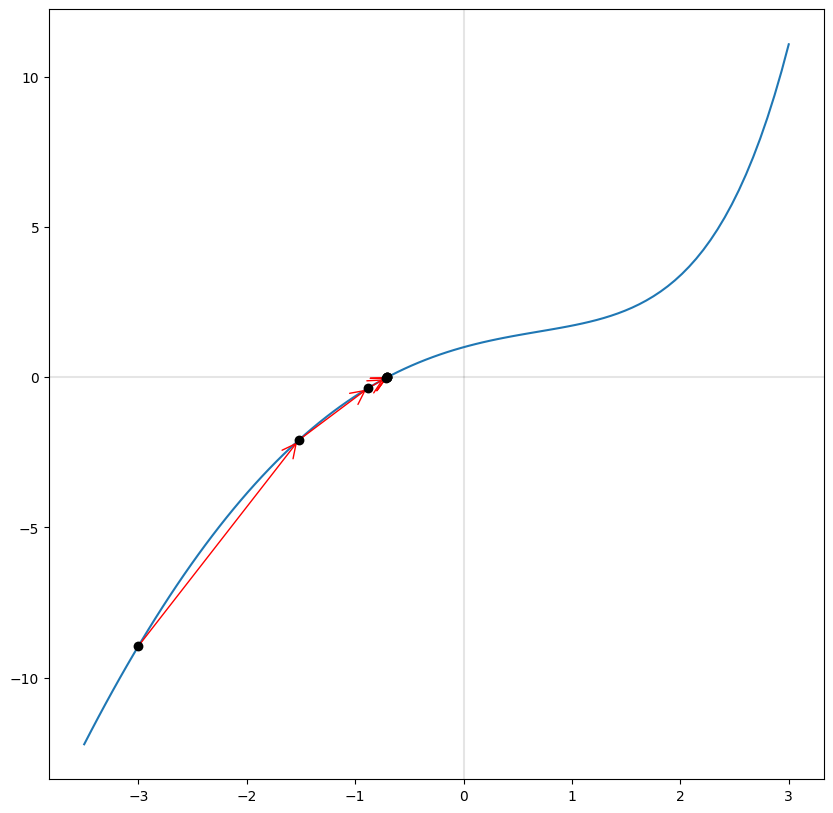

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
xs = np.linspace(-3.5, 3.0, 100)
ax.axhline(y=0, color='k', alpha=0.1)
ax.axvline(x=0, color='k', alpha=0.1)
newt.plot(ax, xs)

In [ ]:
fun = lambda x : np.exp(x) - x ** 2
der = lambda x : np.exp(x) - 2 * x
x0 = 3.0

newt = Newton1d(fun, der)
root = newt.root(x0, steps=5)

root, fun(root)

INFO:root:	x0=3.0	fx0=11.085536923187668
INFO:root:	x0=2.2129844262494096	fx0=4.245662141850337
INFO:root:	x0=1.3129063855006367	fx0=1.9932377730043633
INFO:root:	x0=-0.5138278850583518	fx0=0.33418224912882466
INFO:root:	x0=-0.7193700856032155	fx0=-0.03043435525709287
INFO:root:	x0=-0.7035665915170425	fx0=-0.00018860716576907244


(-0.7035665915170425, -0.00018860716576907244)

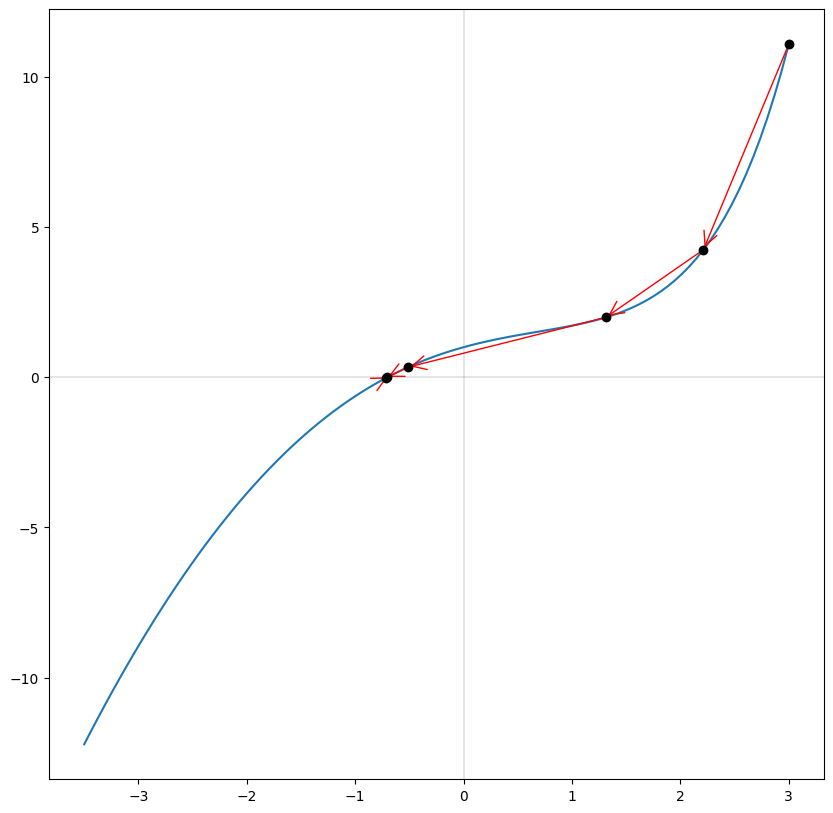

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
xs = np.linspace(-3.5, 3.0, 100)
ax.axhline(y=0, color='k', alpha=0.1)
ax.axvline(x=0, color='k', alpha=0.1)
newt.plot(ax, xs)

In [ ]:
fun = lambda x : np.arctan(x)
der = lambda x : 1.0 / (1.0 + x**2)
x0 = 1.42

newt = Newton1d(fun, der)
root = newt.root(x0, steps=5)

root, fun(root)

INFO:root:	x0=1.42	fx0=0.9572401812829799
INFO:root:	x0=-1.4674192828219805	fx0=-0.9726161911908683
INFO:root:	x0=1.5995501745375065	fx0=1.0120706304347225
INFO:root:	x0=-2.001964658149342	fx0=-1.1075413408557293
INFO:root:	x0=3.544450081591978	fx0=1.2958124463180838
INFO:root:	x0=-14.030817893759995	fx0=-1.4996449561548384


(-14.030817893759995, -1.4996449561548384)

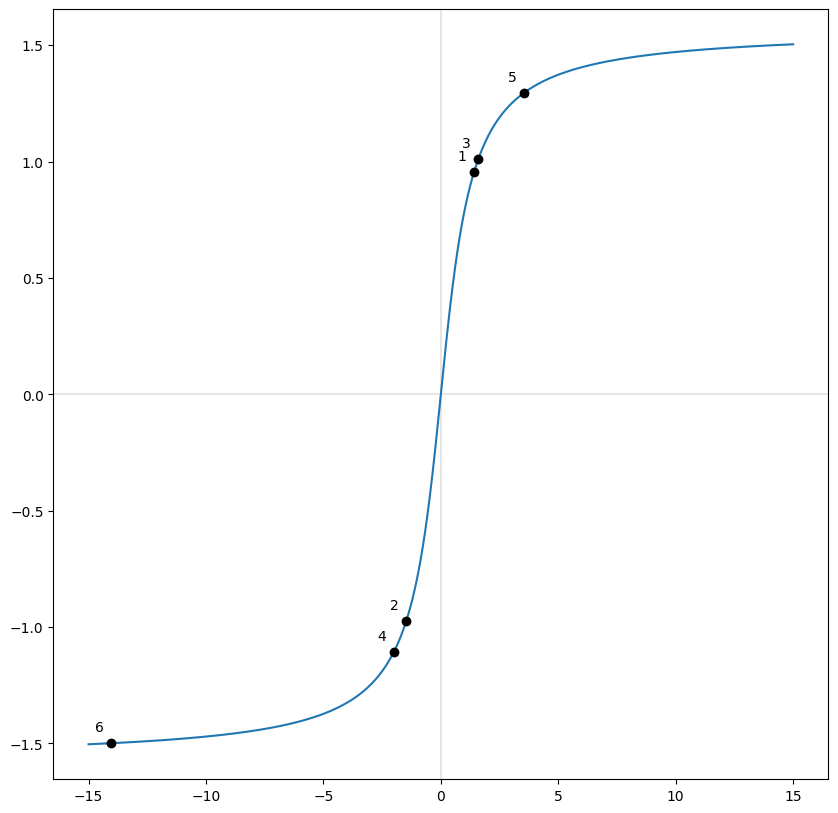

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
xs = np.linspace(-15.0, 15.0, 1000)
ax.axhline(y=0, color='k', alpha=0.1)
ax.axvline(x=0, color='k', alpha=0.1)
newt.plot(ax, xs, arrows=False)

<font size="6" style="font-family: Computer Modern">
    
Ponieważ pochodna jest niewielka, metoda w każdym kolejnym kroku oddala nas od pierwiastka.
</font>

<font size="8" style="font-family: Computer Modern">
Fraktale
</font>

<font size="6" style="font-family: Computer Modern">

Ciekawą ilustracja lokalnej zbieżności metody Newtona są fraktale, które można generować przy jej pomocy.
</font>

<font size="5" style="font-family: Computer Modern">
Metoda:

Ustalmy wielomian $p \in \mathbb{C}[x]$. Załóżmy, że $\deg{p} = n$. Zatem $p$ ma $n$ pierwiastków $\zeta_1, \dots, \zeta_n \in \mathbb{C}$. Płaszczyznę zespoloną dzielimy na $n$ części $G_1, \dots G_n$ w następujący sposób: każdy punkt $z_0 \in \mathbb{C}$ trafia do części $G_k$ jeżeli ciąg generowany przez metodę Newtona o punkcie startowym $z_0$ jest zbieżny do $\zeta_k$.
</font>

In [ ]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [ ]:
class Polynomial:
    def __init__(self, p: list[complex]):
        self.p = np.array(p)

    def __call__(self, x: complex):
        return self._horner(x)

    def _horner(self, x: complex):
        res = 0.0
        for i in range(len(self.p)):
            res = res * x + self.p[i]
        return res

    def derivative(self):
        n = len(self.p) - 1
        return Polynomial(np.array(range(n))[::-1] * self.p[:-1])

    def roots(self):
        return np.roots(self.p)

    def newton(self, z, a: complex, iters: int = 20):
        dp = self.derivative()

        for _ in range(iters):
            z = z - a * self(z) / dp(z)
        return z

    def fractal(self, z, a: complex, iters: int = 20):
        z = self.newton(z, a, iters)
        roots = self.roots()
        expanded_roots = np.array([[roots] * z.shape[0]] * z.shape[1]).T
        return np.argmin(np.abs(expanded_roots - np.array([z] * len(roots))), axis=0)

    def show_fract(self, z, a=1.0, iters=20, cmap=None):
        fig, ax = plt.subplots(figsize=(10, 10))
        z = self.fractal(z, a, iters)
        ax.imshow(z, cmap=cmap)
        plt.axis("off")
        plt.tight_layout()

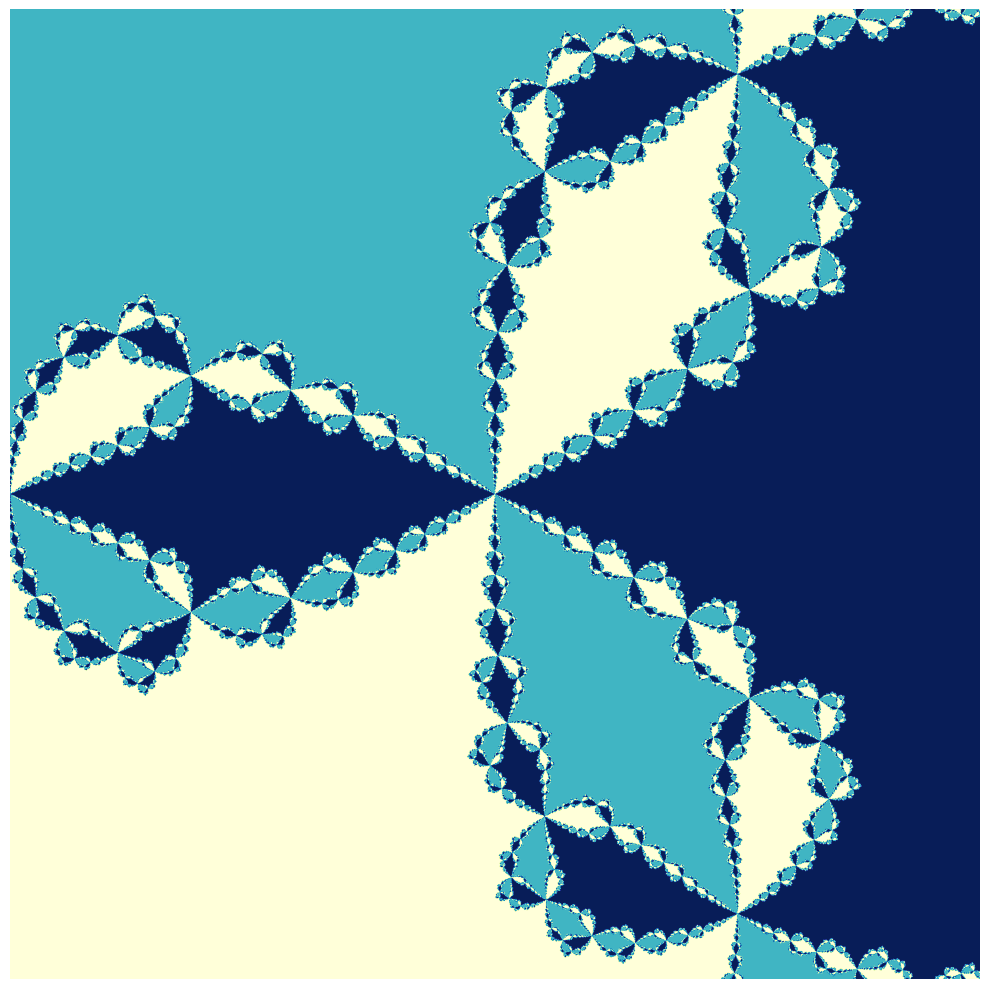

In [ ]:
p = Polynomial([1.0, 0.0, 0.0, -1.0])
c = complex_matrix(-1, 1, -1, 1, pixel_density=1024)
p.show_fract(c, a=1.0, cmap='YlGnBu')

<font size="6" style="font-family: Computer Modern">
    
Fraktal dla wielomianu $z^3 - 1$ i stałej $a=1$.
</font>

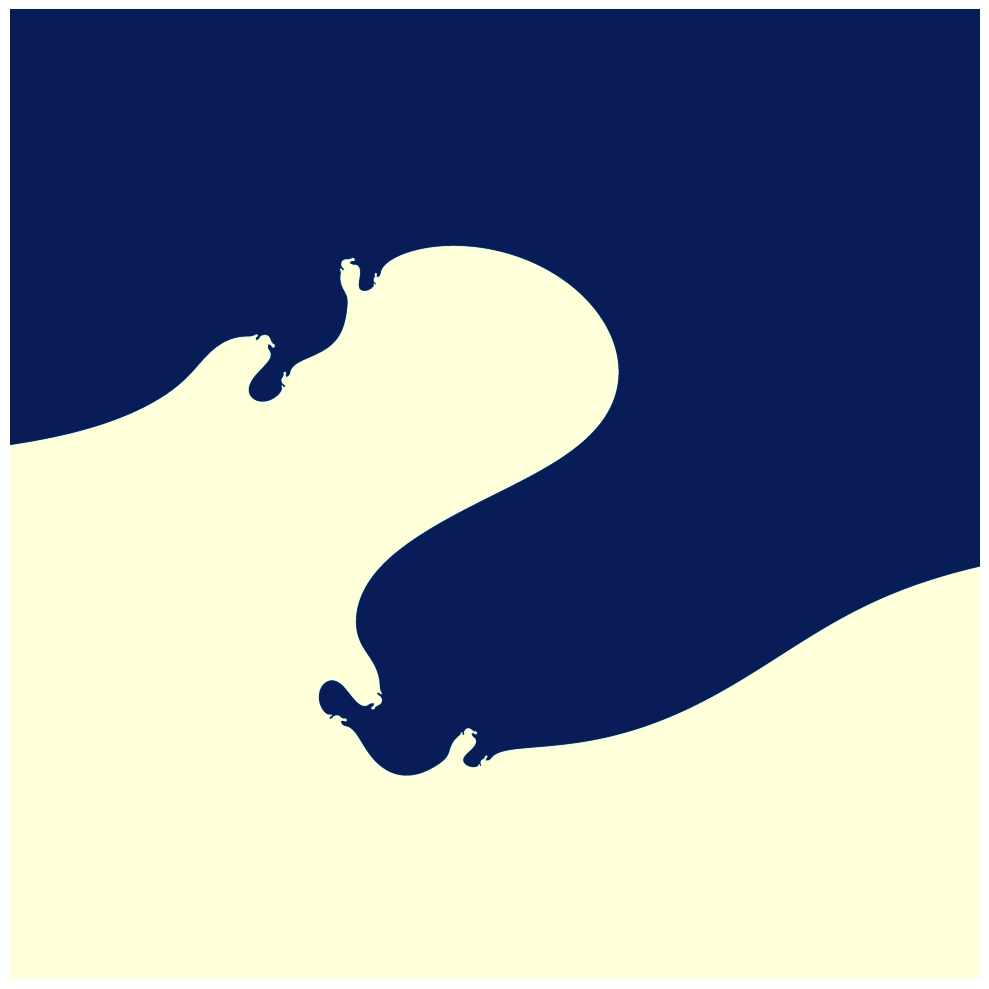

In [ ]:
p = Polynomial([1.0, 1.0, 1.0])
c = complex_matrix(-2, 2, -2, 2, pixel_density=1024)
p.show_fract(c, a=1.0 + 2.0j, cmap='YlGnBu')

<font size="6" style="font-family: Computer Modern">
    
Fraktal dla wielomianu $z^2 + z + 1$ i stałej $a=1 + 2i$.
</font>

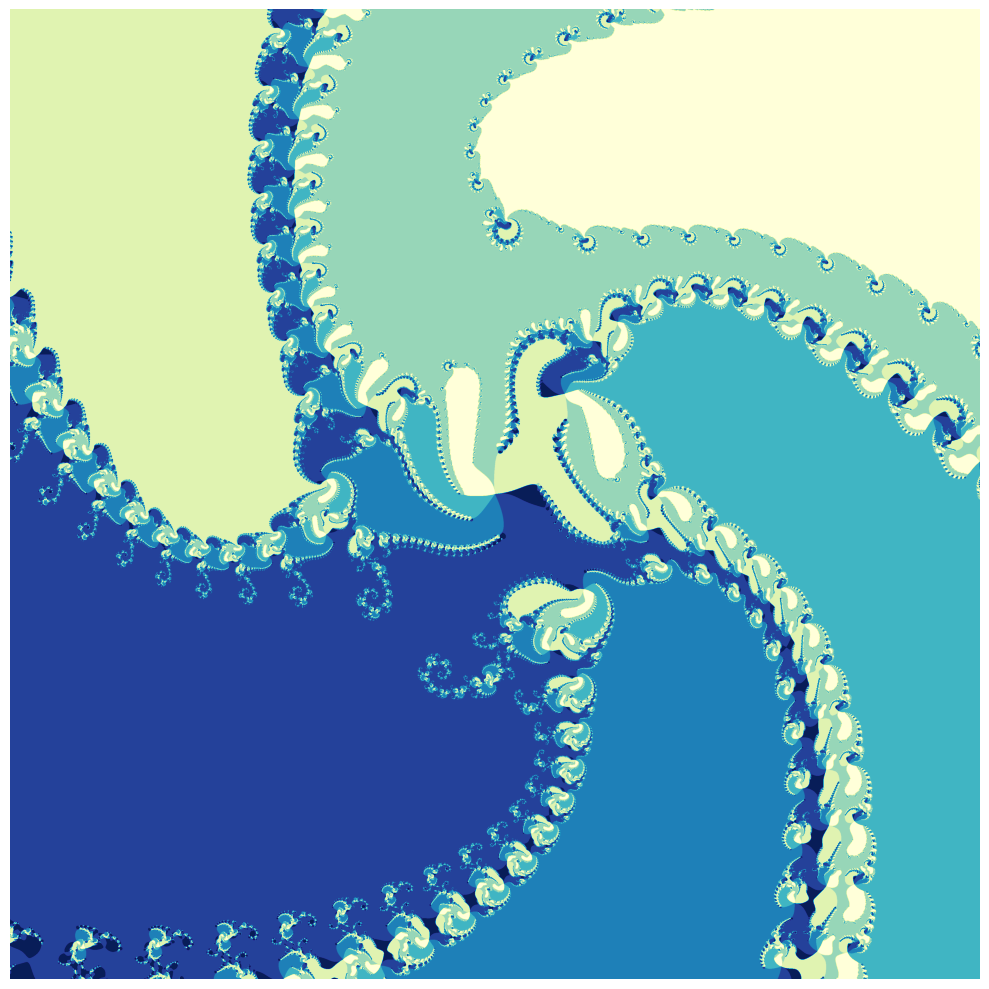

In [ ]:
p = Polynomial([2.0, 1.0j, 2.0, 1.0, -1.0, 2.0, 1.0j, 2.0])
c = complex_matrix(-2, 2, -2, 2, pixel_density=1024)
p.show_fract(c, a=0.5 + 0.5j, cmap='YlGnBu')

<font size="6" style="font-family: Computer Modern">
    
Fraktal dla wielomianu $2z^7 + i z^6 + 2 z^5 + z^4 - z^3 + 2 z^2 + i z + 2$ i stałej $a=\frac{1}{2} + \frac{1}{2}i$.
</font>